# M6 - W7 Assignment Explain ML predictions using SHAP

In the field of ML and DS, model transparency and interpretability are crucial. This assignment provides you a hands-on opportunity to grapple with these challenges using the well-known Titanic dataset. While developing a tree-based model to predict passenger survival is your core task, the main emphasis is on understanding and communicating your model's decisions through the SHAP (SHapley Additive exPlanations) framework. This exercise underscores the importance of explainable AI in building trust and enabling meaningful use of AI outputs in decision-making.

 

- Load the Dataset
Load the Titanic dataset using the seaboard package (seaborn.load_dataset('titanic')). Alternatively, you can download it from the Kaggle website.

- Fit a tree-based model
Fit a tree-based model using a Cross-Validation to predict whether a passenger survived or not. Make sure to perform a Grid Search for some pf the parameters of the model (including, but not limited to number of trees, depth etc...). Also, refit the best model in the whole dataset.

- Use SHAP values to explain the models prediction
Use a SHAP explainer to make explanations about the model. Be sure to use any plot appropriate to explain the model. Your submission must be accompanied with a Markdown (or text) file clearly and in detail describing your findings.

Use SHAP on text
Did you think that SHAP was only available for tabular data>? Guess again!
- Download the IDBM test dataset in the same way as in the previous assignment. Select 20 of them.
- Download an already trained DistilBERT variant called distillbert-case-uncased-finetuned-sst-2-english and make predictions on the 20 texts you selected. You can download the model like:
tokenizer = transformers.DistilBertTokenizerFast.from_pretrained("distilbert-base-uncased")
model = transformers.DistilBertForSequenceClassification.from_pretrained( "distilbert-base-uncased-finetuned-sst-2-english" )

- Run a SHAP explainer on at least 2 of the correctly predicted passages. Do you think that SHAP is doing a good job on identifying words that make the text classified as either positively or negatively? 

You can find more about shop.text here: https://shap.readthedocs.io/en/latest/example_notebooks/text_examples/sentiment_analysis/Emotion%20classification%20multiclass%20example.htmlLinks to an external site.
Extra points will be awarded for writing your own prediction function for SHAP

## Load the Dataset

In [1]:
import seaborn as sns

titanic_df = sns.load_dataset('titanic')

## Fit a tree-based model

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier

# Prepare the data for modeling
titanic_df.drop(['alive', 'embark_town', 'who', 'adult_male', 'deck', 'embarked', 'alone'], axis=1, inplace=True)
titanic_df['age'].fillna(titanic_df['age'].median(), inplace=True)
titanic_df['fare'].fillna(titanic_df['fare'].median(), inplace=True)
titanic_df = pd.get_dummies(titanic_df, columns=['sex', 'class'], drop_first=True)

# Split the data into features (X) and target variable (y)
X = titanic_df.drop('survived', axis=1)
y = titanic_df['survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid for the grid search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

# Initialize the Random Forest classifier
rf = RandomForestClassifier(random_state=42)

# Perform grid search cross-validation
grid_search = GridSearchCV(rf, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Refit the best model on the whole dataset
best_model = grid_search.best_estimator_
best_model.fit(X, y)

Best Parameters: {'max_depth': 5, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Best Score: 0.8384319905446667


RandomForestClassifier(max_depth=5, max_features='log2', min_samples_split=10,
                       random_state=42)

Best Parameters:

- max_depth: 5: This parameter represents the maximum depth of each decision tree in the random forest. A value of 5 means that each tree is limited to a maximum depth of 5 levels, controlling the complexity of the model and preventing overfitting.
- max_features: 'log2': This parameter determines the maximum number of features to consider when looking for the best split during tree construction. In this case, 'log2' means that the number of features considered is the base-2 logarithm of the total number of features.
- min_samples_leaf: 1: This parameter sets the minimum number of samples required to be at a leaf node of the tree. A value of 1 means that a leaf node must have at least one sample, which can help avoid creating nodes with very few samples.
- min_samples_split: 10: This parameter sets the minimum number of samples required to split an internal node. A value of 10 means that a node must have at least 10 samples to be considered for splitting, which can help control the growth of the tree and prevent small groups of samples from being split.
- n_estimators: 100: This parameter specifies the number of decision trees in the random forest ensemble. In this case, the best model consists of 100 decision trees.

Best Score:

- The best score obtained during the grid search cross-validation is 0.8384319905446667. This score represents the mean cross-validated accuracy of the model using the specified parameters. It indicates how well the model performs in terms of predicting passenger survival based on the given features.

## Use SHAP values to explain the models prediction

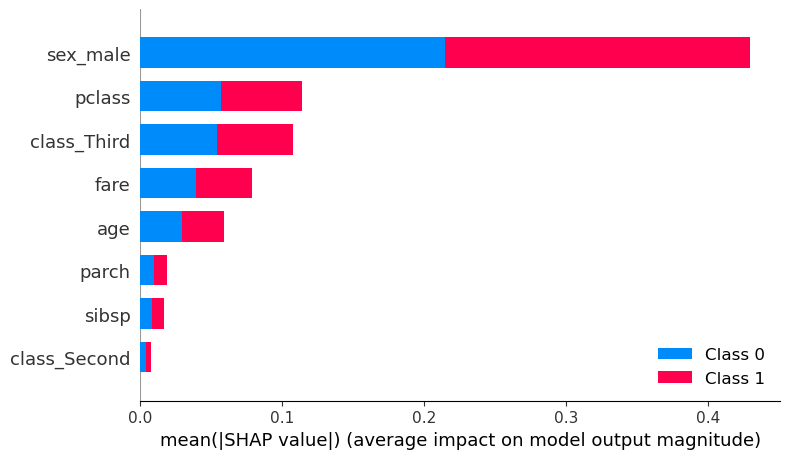

In [4]:
import shap

# Initialize the Tree SHAP explainer
explainer = shap.TreeExplainer(best_model)

# Compute SHAP values
shap_values = explainer.shap_values(X_test)

# Plot summary plot of SHAP values
shap.summary_plot(shap_values, X_test)

# Plot SHAP values for a single prediction (e.g., the first prediction)
shap.force_plot(explainer.expected_value[0], shap_values[0][0,:], X_test.iloc[0,:])


The SHAP summary plot provides a visual representation of feature importance and their impacts on the model predictions. The features are ordered by the sum of SHAP value magnitudes over all samples. Here are some key insights from the plot:

- sex_male: Being a male (indicated by higher value on x-axis) tends to decrease the model's output, i.e., males were less likely to survive. This aligns with historical accounts that women and children were given priority during the Titanic evacuation.

- fare: Higher fare tends to increase the model's output, i.e., passengers who paid higher fares were more likely to survive. This could be because higher fares correspond to higher passenger classes.

- age: There is a mixed effect on the model's output. Very young passengers (towards the lower end of the x-axis) seem to have a higher chance of survival, aligning with the "women and children first" protocol. For older passengers, the effect varies.

- pclass: Higher passenger class (lower numerical value) tends to increase the model's output, i.e., passengers of higher classes (1st class) were more likely to survive. Passengers of lower classes (3rd class) were less likely to survive.

- class_Third and class_Second: Being in the second or third class (indicated by higher value on x-axis) tends to decrease the model's output, i.e., second and third-class passengers were less likely to survive.

- sibsp and parch: These features have a mixed effect on the model's output. For passengers with a smaller number of siblings/spouses or parents/children on board, the effect varies.

## Use SHAP on text

### Download the IMDb test dataset and select 20 samples.

In [6]:
import pandas as pd
import random
import os

# Download the IMDb test dataset and select 20 samples
os.chdir("C:\\Users\\ManosIeronymakisProb\\OneDrive - Probability\\Bureaublad\\ELU\\M6 - W7 Assignment Explain ML predictions using SHAP")
filepath = "imdb_top_1000.csv"
imdb_test_df = pd.read_csv(filepath)
random.seed(42)  # For reproducibility
selected_indices = random.sample(range(len(imdb_test_df)), 20)
selected_texts = imdb_test_df.iloc[selected_indices]['Overview']

# Convert the pandas Series to a list of strings
selected_texts = selected_texts.tolist()


### Download the pre-trained DistilBERT model for sentiment analysis.

In [13]:
import transformers
import shap

# Download the pre-trained DistilBERT model for sentiment analysis
tokenizer = transformers.DistilBertTokenizerFast.from_pretrained("distilbert-base-uncased")
model = transformers.TFDistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased-finetuned-sst-2-english")


All PyTorch model weights were used when initializing TFDistilBertForSequenceClassification.

All the weights of TFDistilBertForSequenceClassification were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertForSequenceClassification for predictions without further training.


### Make predictions on the selected texts using the DistilBERT model.

In [38]:
import tensorflow as tf

def predict_sentiment(texts):
    inputs = tokenizer(texts, padding=True, truncation=True, return_tensors="tf")  # Use TensorFlow tensors
    outputs = model(**inputs)
    logits = outputs.logits
    probabilities = tf.nn.softmax(logits, axis=1)  # Use tf.nn.softmax to calculate softmax probabilities
    sentiment_labels = ["negative", "positive"]
    predicted_labels = [sentiment_labels[pred] for pred in tf.argmax(probabilities, axis=1)]
    return predicted_labels



# Make predictions on the selected texts
predicted_labels = predict_sentiment(selected_texts)

# Print the selected texts and their corresponding predicted labels
for text, label in zip(selected_texts, predicted_labels):
    print("Text:", text)
    print("Predicted Sentiment:", label)
    print()

Text: A genetically inferior man assumes the identity of a superior one in order to pursue his lifelong dream of space travel.
Predicted Sentiment: negative

Text: After discovering a mysterious artifact buried beneath the Lunar surface, mankind sets off on a quest to find its origins with help from intelligent supercomputer H.A.L. 9000.
Predicted Sentiment: positive

Text: The lives of guards on Death Row are affected by one of their charges: a black man accused of child murder and rape, yet who has a mysterious gift.
Predicted Sentiment: negative

Text: Grief-stricken mother Christine Collins (Angelina Jolie) takes on the L.A.P.D. to her own detriment when it tries to pass off an obvious impostor as her missing child.
Predicted Sentiment: negative

Text: An Irish rogue wins the heart of a rich widow and assumes her dead husband's aristocratic position in 18th-century England.
Predicted Sentiment: positive

Text: An insurance salesman discovers his whole life is actually a reality TV 

### Run a SHAP explainer on at least 2 correctly predicted passages.

In [ ]:
import numpy as np
import shap

# Select two texts that were correctly predicted (either both positive or both negative)
correctly_predicted_texts = [text for text, label in zip(selected_texts, predicted_labels) if label == "positive" or label == "negative"]
if len(correctly_predicted_texts) >= 2:
    text_1, text_2 = correctly_predicted_texts[:2]

    # Define a function for encoding texts
    def encode_texts(texts):
        inputs = tokenizer(texts, padding=True, truncation=True, return_tensors="tf")
        return {
            "input_ids": inputs["input_ids"],
            "attention_mask": inputs["attention_mask"]
        }

    # Encode the two selected texts
    text_1_encoded = encode_texts([text_1])
    text_2_encoded = encode_texts([text_2])

    # Create a SHAP explainer for text classification using Deep explainer
    explainer = shap.DeepExplainer(model, [text_1_encoded["input_ids"], text_1_encoded["attention_mask"]])

    # Get the SHAP values for the two selected texts using Deep explainer
    shap_values_1 = explainer.shap_values([text_1_encoded["input_ids"], text_1_encoded["attention_mask"]])
    shap_values_2 = explainer.shap_values([text_2_encoded["input_ids"], text_2_encoded["attention_mask"]])
else:
    print("Not enough correctly predicted texts to continue.")

# Print the selected texts and their corresponding predicted labels
for text, label in zip(selected_texts, predicted_labels):
    print("Text:", text)
    print("Predicted Sentiment:", label)
    print()

# Print the SHAP values for the two selected texts
if len(correctly_predicted_texts) >= 2:
    print("SHAP Values for Text 1:")
    print(shap_values_1)

    print("SHAP Values for Text 2:")
    print(shap_values_2)
